In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow
import os
from typing import Iterable, Optional
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, average_precision_score
)

from matplotlib.axes import Axes

sns.set();
df = pd.read_parquet("/Users/nikita/python_projects/add_datatest/src/input/dataset.parquet")

In [207]:
display(df)

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0
4,7712572,1.557217e+09,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1.557217e+09,1.557217e+09,264.0,2,3,-1,0.003008,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442956,18250961,1.696106e+09,0x3dc6d0168838c40e26d105115908ee833b24e56a,1.677567e+09,1.696106e+09,18539076.0,68,91,-23,0.352223,...,-0.992921,3.327281,21.642831,116.954834,-0.430690,0.018477,1.018477,0,1,0
442957,18251701,1.696115e+09,0x3af16178664dd4b2500c9d02c53347e86b3e7873,1.624471e+09,1.695934e+09,71643811.0,154,168,-14,1.382943,...,-0.992921,3.327281,21.642831,116.954834,-0.430690,0.018477,1.018477,1,1,1
442958,18251742,1.696116e+09,0xba01430a43496df98956e42aab08eb85ca107bb1,1.613776e+09,1.696116e+09,82339560.0,163,310,-147,1.218006,...,-0.992921,3.327281,21.642831,116.954834,-0.430690,0.018477,1.018477,1,1,1
442959,18251864,1.696117e+09,0x1f2b17bff4a0313ec6342eef464742ad1c2de83c,1.671973e+09,1.695933e+09,24144360.0,117,221,-104,0.738964,...,-0.992921,3.327281,21.642831,116.954834,-0.430690,0.018477,1.018477,1,1,0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442961 entries, 0 to 442960
Data columns (total 78 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   borrow_block_number                      442961 non-null  int64  
 1   borrow_timestamp                         442961 non-null  float64
 2   wallet_address                           442961 non-null  object 
 3   first_tx_timestamp                       442961 non-null  float64
 4   last_tx_timestamp                        442961 non-null  float64
 5   wallet_age                               442961 non-null  float64
 6   incoming_tx_count                        442961 non-null  int64  
 7   outgoing_tx_count                        442961 non-null  int64  
 8   net_incoming_tx_count                    442961 non-null  int64  
 9   total_gas_paid_eth                       442961 non-null  float64
 10  avg_gas_paid_per_tx_eth         

In [209]:
df["index"] = df.index

In [210]:
df["subset"] = "train"
df = df.sample(frac=1)
df["subset"][200000:300000] = "val"
df["subset"][300000:] = "test"


/var/folders/5r/k_g1yy617_z_4pflgbk8gn2r0000gn/T/ipykernel_33525/3723495643.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["subset"][200000:300000] = "val"
/var/folders/5r/k_g1yy617_z_4pflgbk8gn2r0000gn/T/ipykernel_33525/3723495643.p

In [211]:
df

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target,index,subset
342282,15029076,1.656248e+09,0x73a304c61298c030a67877193722ef1660347ea4,1.621247e+09,1.655520e+09,35001368.0,22,26,-4,0.103248,...,15.512907,259.946908,-21.664777,0.008304,1.008304,1,1,0,342282,train
42670,10320973,1.592901e+09,0x14e56cf9e6257475f9b6310adc98865fc24d6504,1.504460e+09,1.592871e+09,88441499.0,1118,1644,-526,5.126209,...,22.399429,27.244587,-1.420478,0.021222,1.021222,1,1,1,42670,train
372535,15585987,1.663815e+09,0x922d012c7e8fce3c46ac761179bdb6d16246782d,1.625744e+09,1.663815e+09,38071048.0,195,276,-81,1.967809,...,14.003419,187.076543,-0.443244,-0.254297,0.745703,1,1,0,372535,train
110519,11623332,1.610232e+09,0xa060503a72899dc958ddc97e88d7df9a6bd72ebb,1.579036e+09,1.610232e+09,31196090.0,377,480,-103,3.326085,...,41.211878,519.762767,21.521608,0.673498,1.673498,1,1,0,110519,train
239209,12892052,1.627170e+09,0xeb929c03858c62d8d886eeaf1e5e1884f0df23ea,1.619516e+09,1.627170e+09,7654779.0,354,1261,-907,1.006628,...,24.608046,518.334952,-6.475875,0.095198,1.095198,1,1,0,239209,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270745,13319870,1.632908e+09,0x6c85553e86609ba71f646bfdc506d65981a4a2d9,1.519485e+09,1.632897e+09,113423323.0,241,184,57,0.857993,...,14.529505,513.812252,-8.017690,-0.182027,0.817973,1,1,1,270745,test
290535,13698201,1.638045e+09,0x0fed94ba4f477ae9cddf413a4b16f6e63405d043,1.618879e+09,1.638014e+09,19166439.0,397,500,-103,3.693977,...,14.391081,570.651556,-4.347283,-0.043985,0.956015,1,1,0,290535,test
415006,16729395,1.677621e+09,0x823dafe1fcdd9e36387afb542497e837c85b50f4,1.656835e+09,1.677620e+09,20785538.0,45,42,3,0.234294,...,25.174365,204.858835,1.954407,0.000794,1.000794,1,1,0,415006,test
351067,15210711,1.658739e+09,0xeab23c1e3776fad145e2e3dc56bcf739f6e0a393,1.613117e+09,1.658739e+09,45622254.0,405,532,-127,9.731025,...,30.577660,441.564707,10.489664,0.391267,1.391267,1,1,0,351067,test


In [212]:
tech = ["index"]
features = ['borrow_block_number', 'borrow_timestamp',
       'first_tx_timestamp', 'last_tx_timestamp',
       'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff','risk_factor',
       'time_since_first_deposit','time_since_last_liquidated',
       'market_adx', 'market_adxr', 'market_apo',
       'market_aroonosc', 'market_aroonup', 'market_atr', 'market_cci',
       'market_cmo', 'market_correl', 'market_dx', 'market_fastk',
       'market_fastd','market_linearreg_slope',
       'market_macd_macdext', 'market_macd_macdfix', 'market_macd',
       'market_macdsignal_macdext', 'market_macdsignal_macdfix',
       'market_macdsignal', 'market_max_drawdown_365d', 'market_natr',
       'market_plus_di', 'market_ppo', 'market_rocp',
       'market_rocr', 'unique_borrow_protocol_count',]

In [213]:
features

['borrow_block_number',
 'borrow_timestamp',
 'first_tx_timestamp',
 'last_tx_timestamp',
 'risky_last_tx_timestamp',
 'risky_first_last_tx_timestamp_diff',
 'risk_factor',
 'time_since_first_deposit',
 'time_since_last_liquidated',
 'market_adx',
 'market_adxr',
 'market_apo',
 'market_aroonosc',
 'market_aroonup',
 'market_atr',
 'market_cci',
 'market_cmo',
 'market_correl',
 'market_dx',
 'market_fastk',
 'market_fastd',
 'market_linearreg_slope',
 'market_macd_macdext',
 'market_macd_macdfix',
 'market_macd',
 'market_macdsignal_macdext',
 'market_macdsignal_macdfix',
 'market_macdsignal',
 'market_max_drawdown_365d',
 'market_natr',
 'market_plus_di',
 'market_ppo',
 'market_rocp',
 'market_rocr',
 'unique_borrow_protocol_count']

In [214]:
def plot_univariate_by_target(
    df: pd.DataFrame,
    features: list[str] | None = None,
    target: str = "target",
    bins: int = 50,
    sample: int | None = 200_000,
    palette: str = "Set2",
    max_plots: int | None = None,
):
   
    if target not in df.columns:
        print(f"Target '{target}' не найден в колонках")
        return

    if features is None:
        features = df.select_dtypes(include=[np.number]).columns.tolist()
        if target in features:
            features.remove(target)

    num_cols = [c for c in features if c in df.columns and pd.api.types.is_numeric_dtype(df[c])]

    data = df
    if sample is not None and len(df) > sample:
        data = df.sample(sample, random_state=42)

    data = data.dropna(subset=[target])

    shown = 0
    for col in num_cols:
        if data[col].dropna().empty:
            continue
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))
        sns.histplot(data=data, x=col, hue=target, bins=bins, stat="density", common_norm=False, palette=palette, ax=axes[0])
        axes[0].set_title(f"Hist • {col} by {target}")
        sns.boxplot(data=data, x=target, y=col, hue=target, palette=palette, dodge=False, ax=axes[1])
        axes[1].set_title(f"Box • {col} by {target}")
        leg = axes[1].get_legend()
        if leg is not None:
            leg.remove()
        fig.tight_layout()
        plt.show()
        shown += 1
        if max_plots is not None and shown >= max_plots:
            break


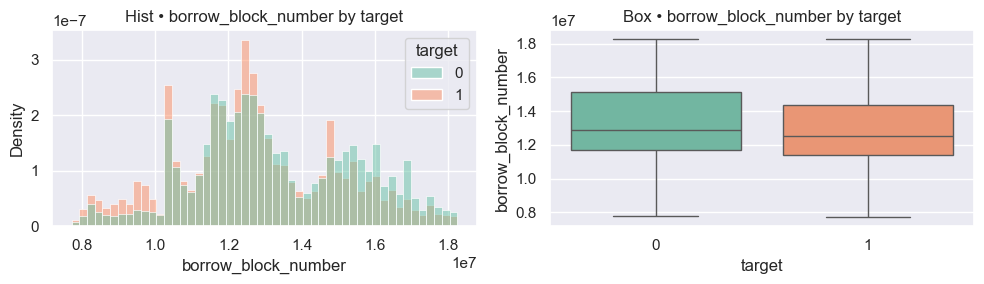

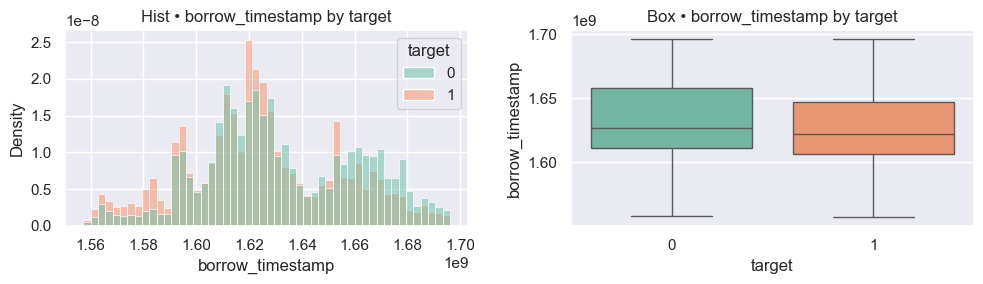

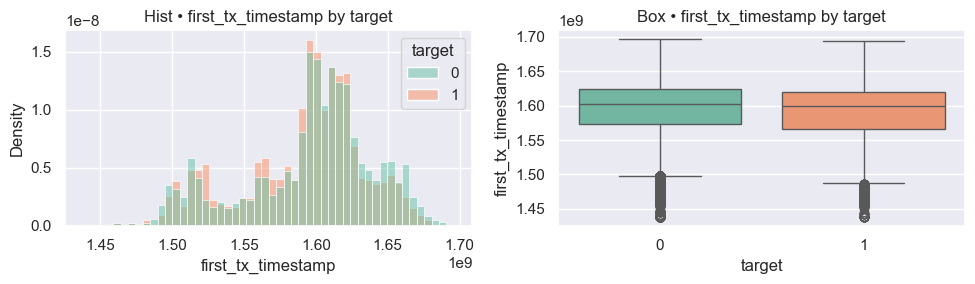

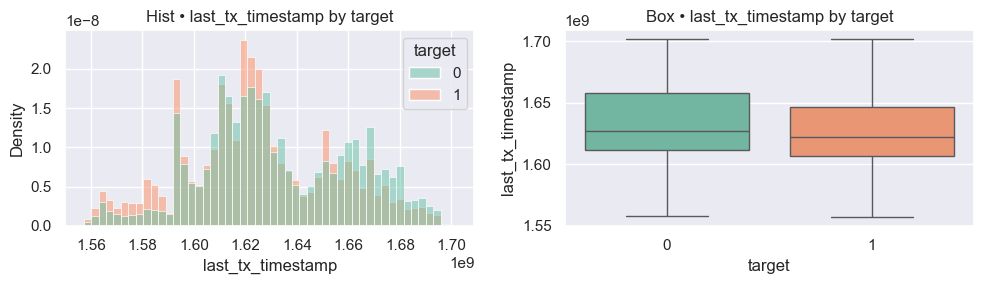

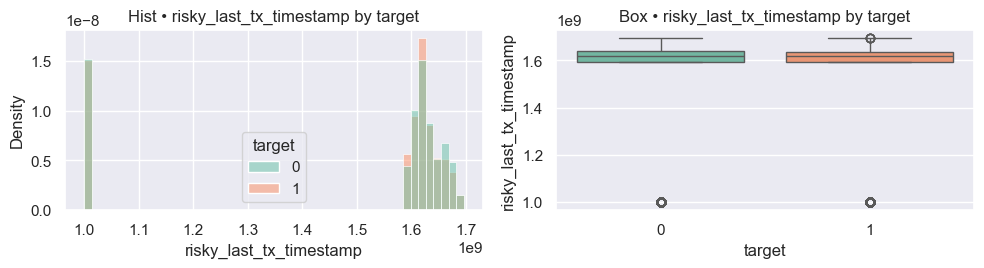

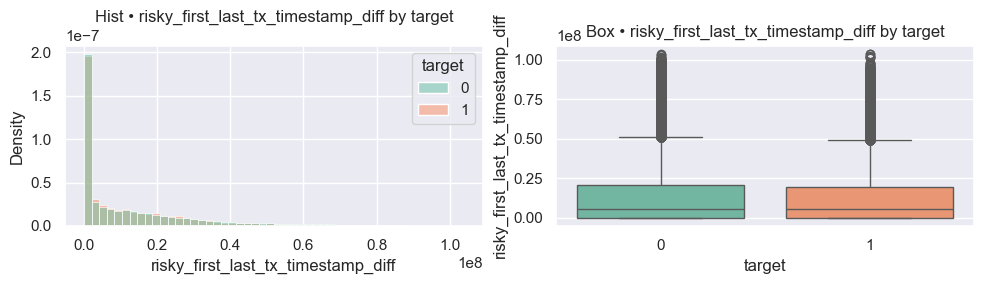

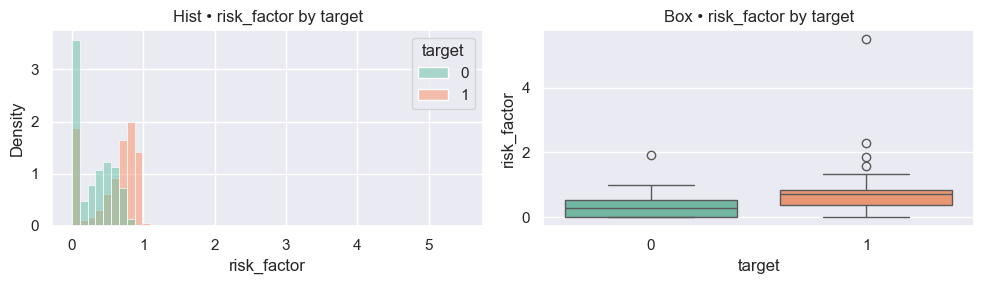

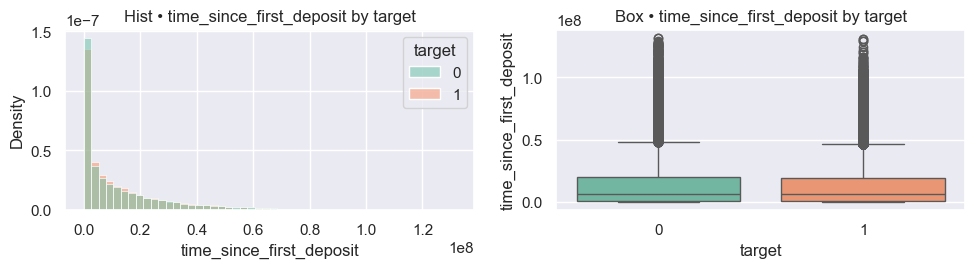

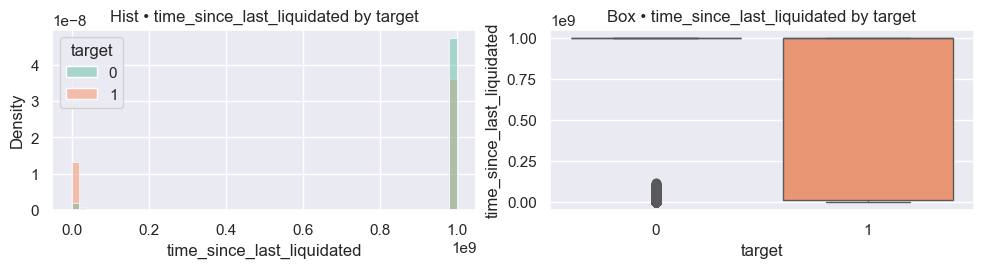

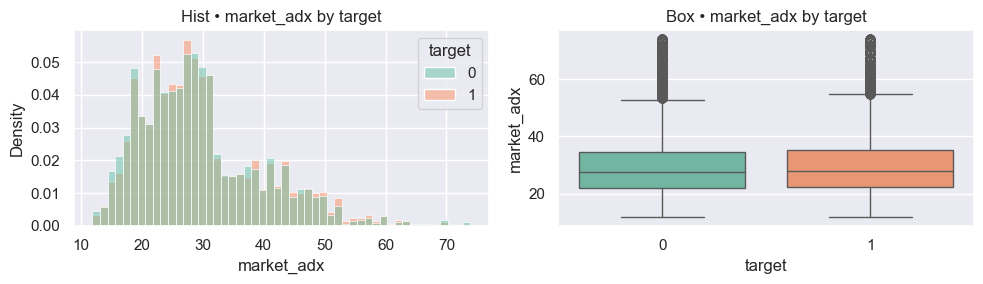

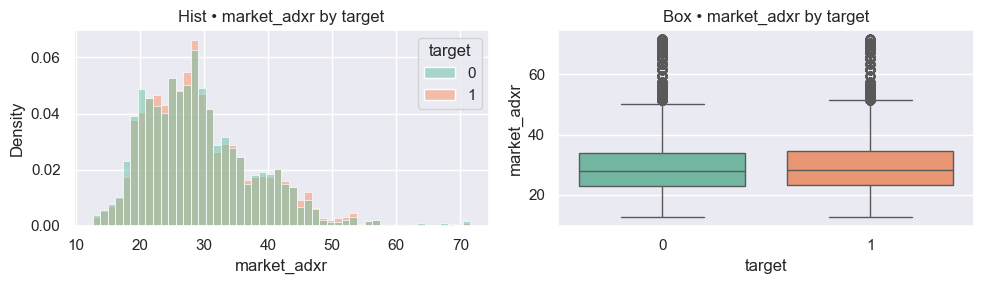

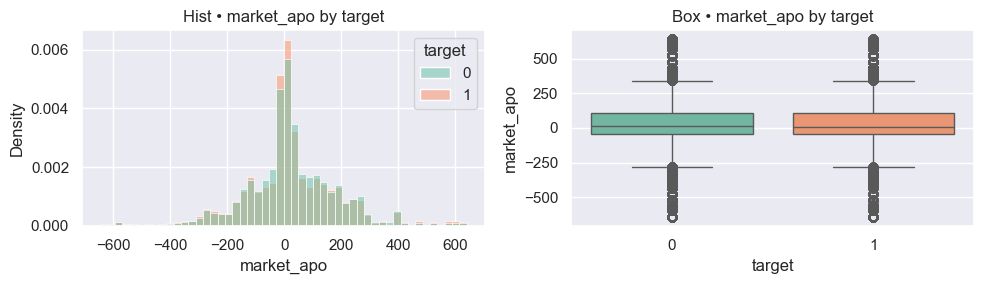

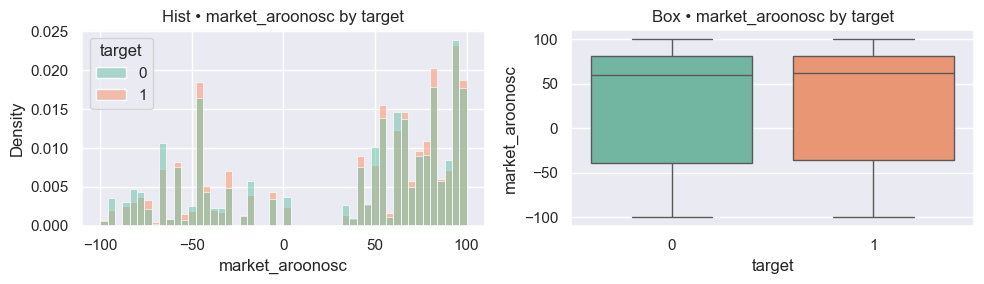

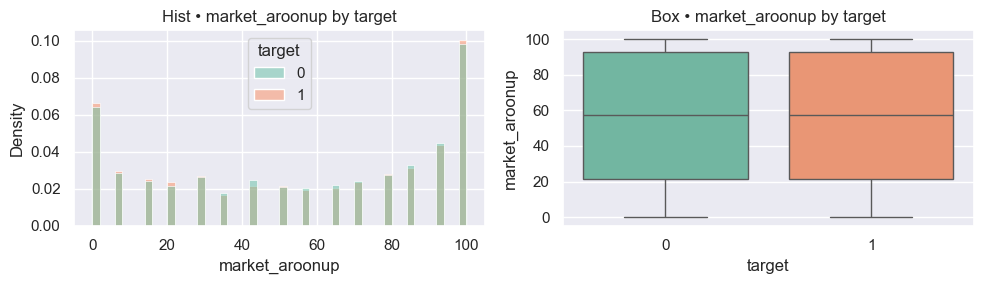

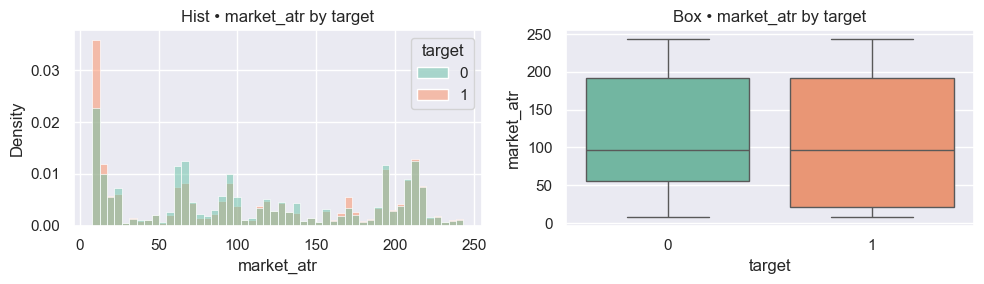

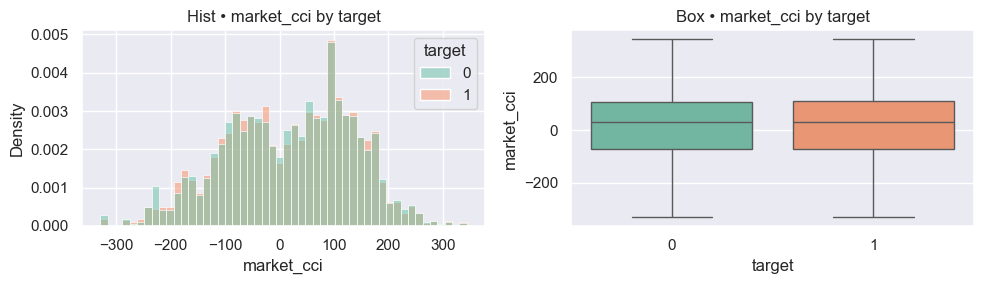

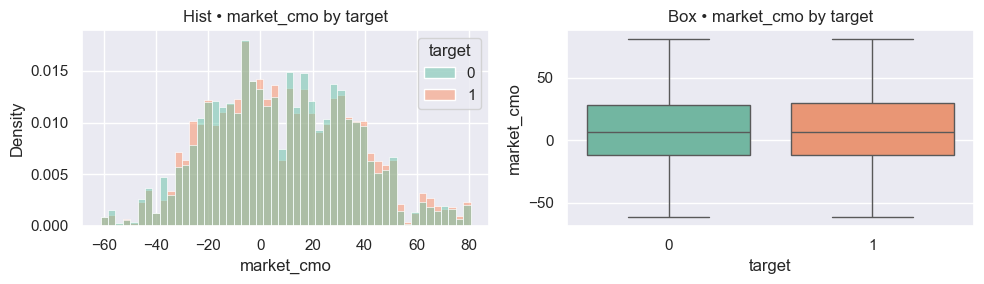

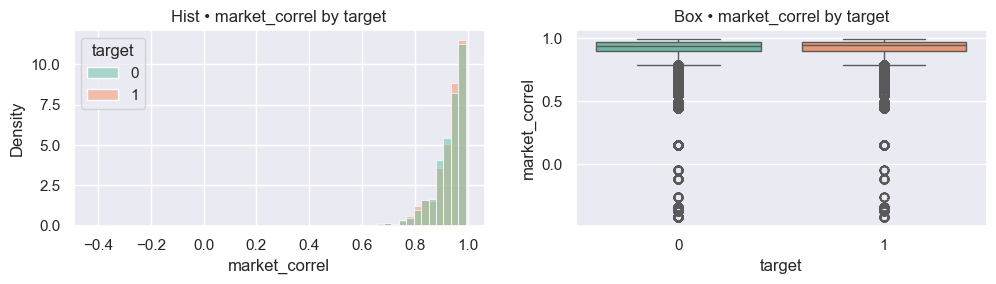

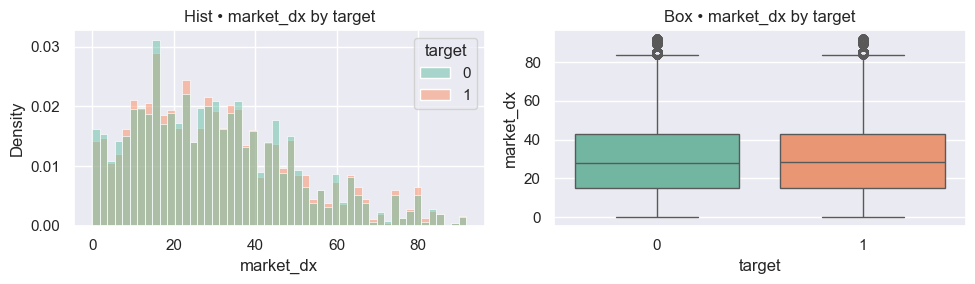

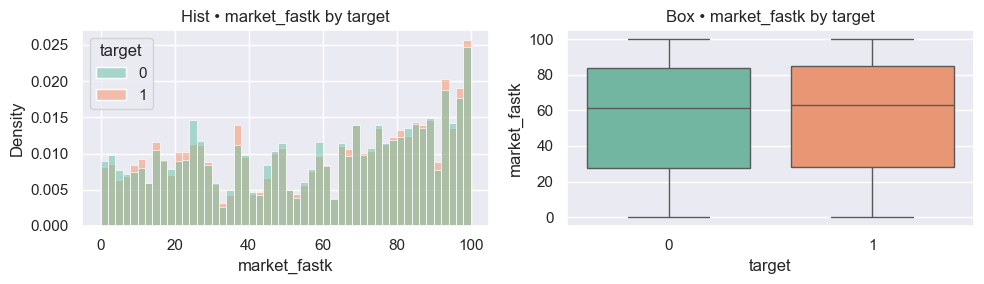

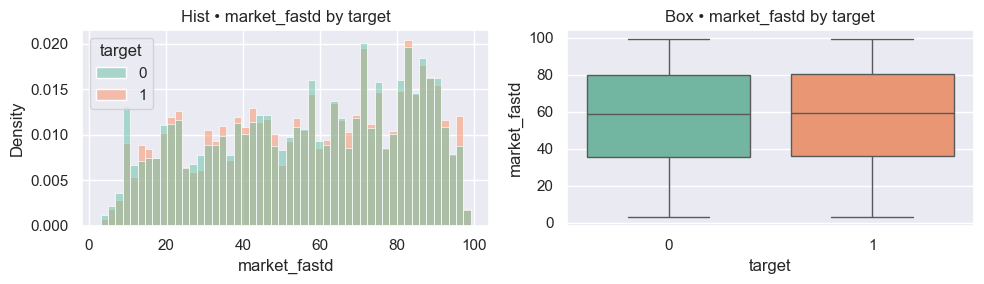

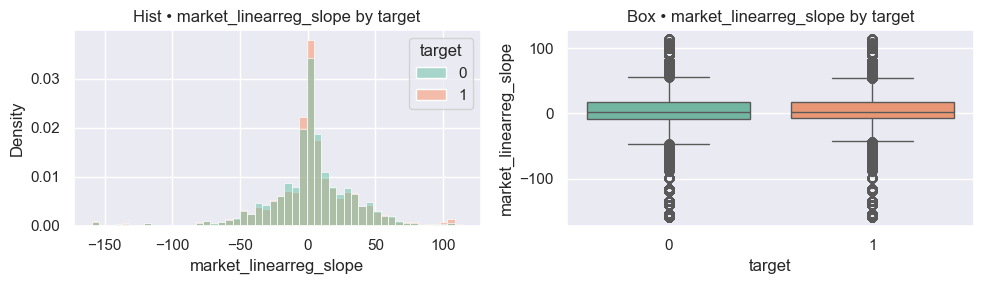

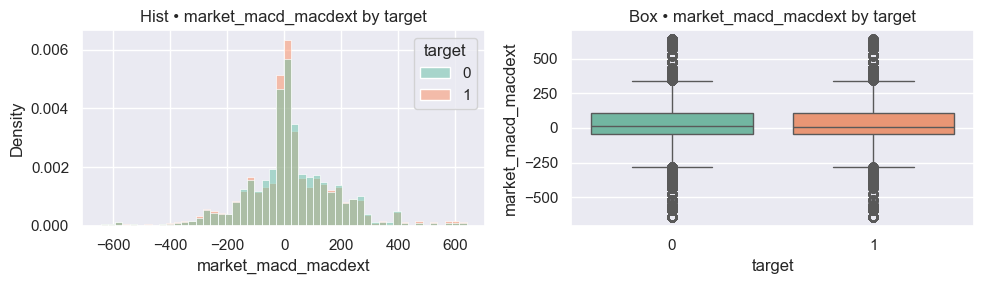

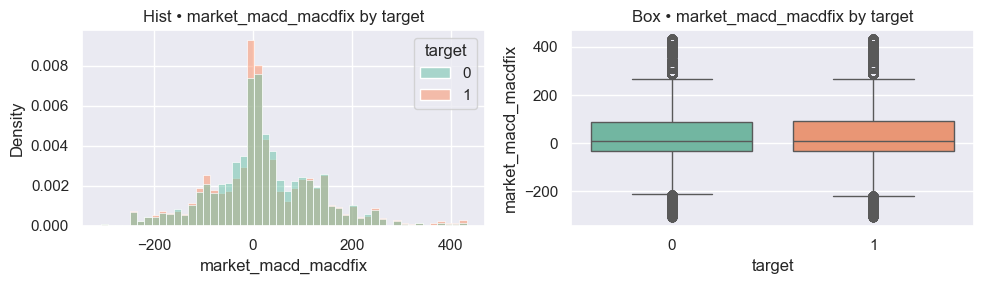

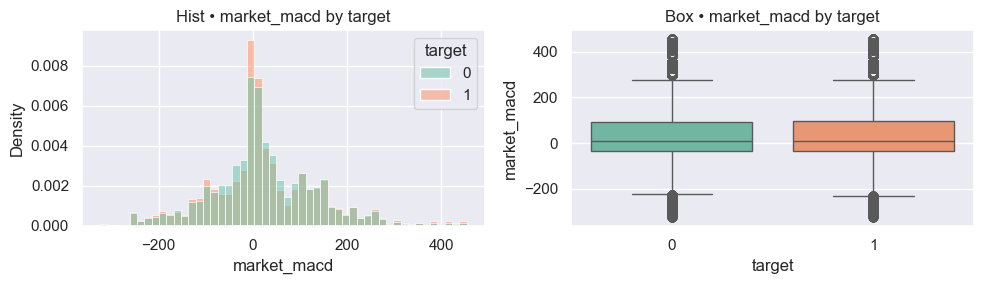

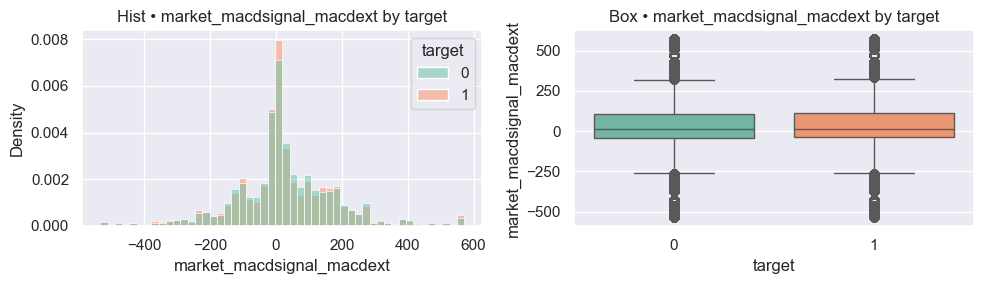

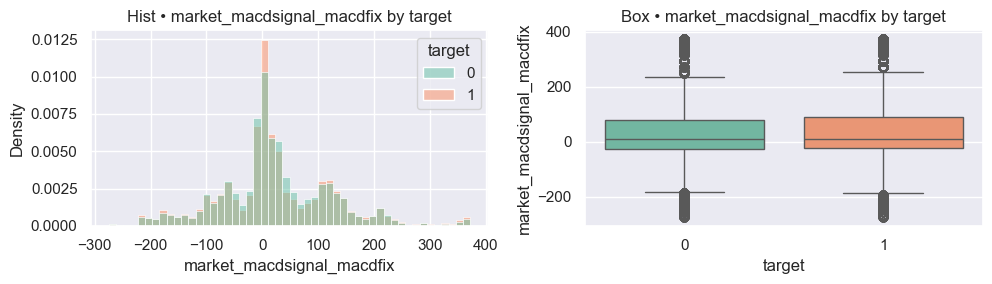

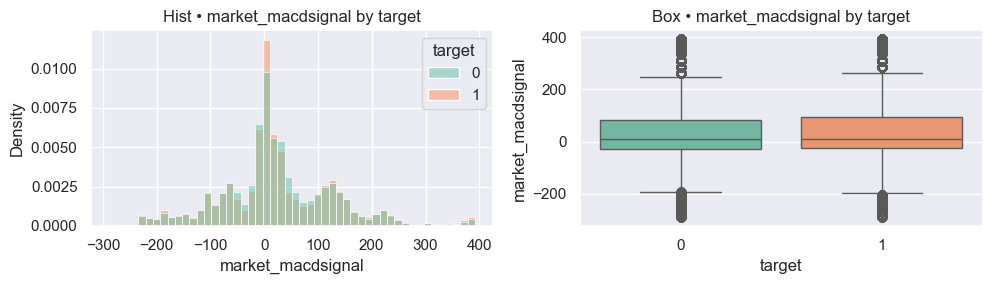

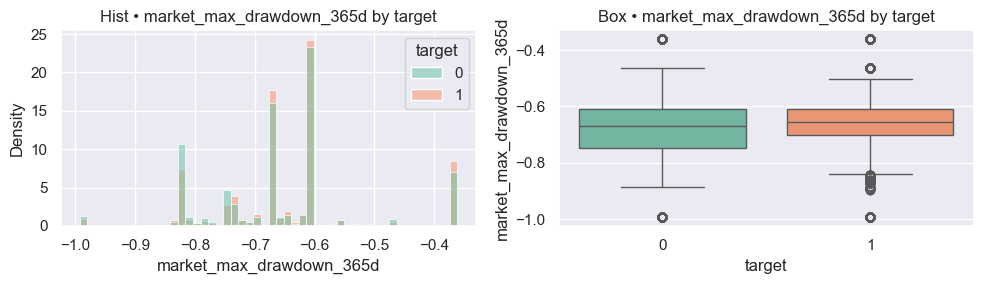

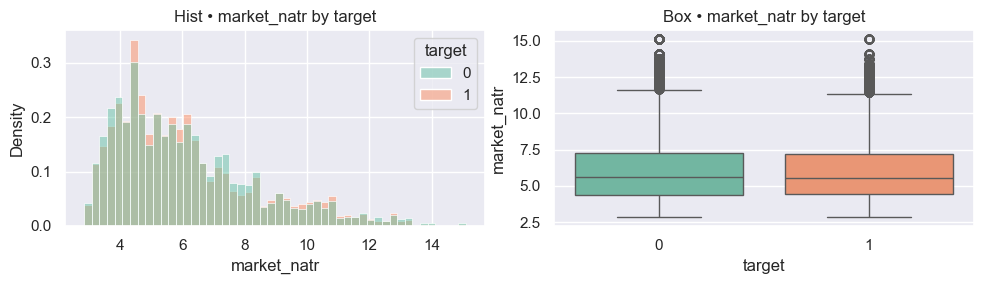

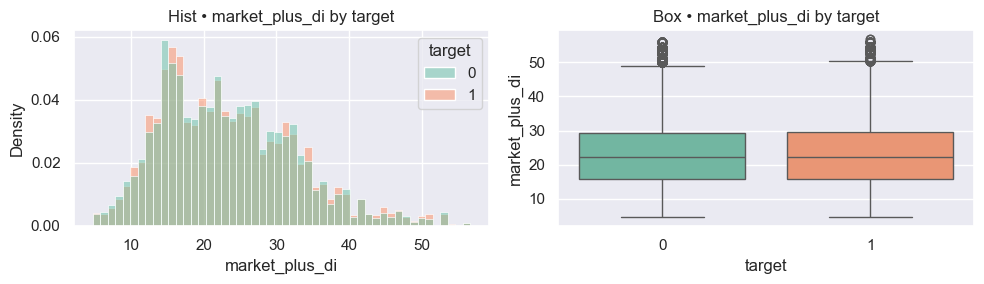

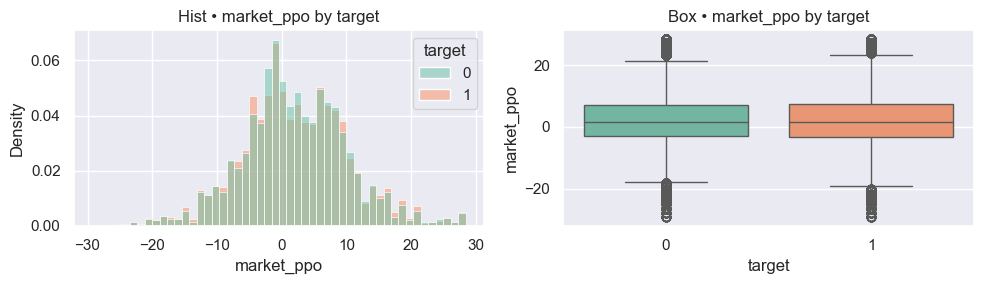

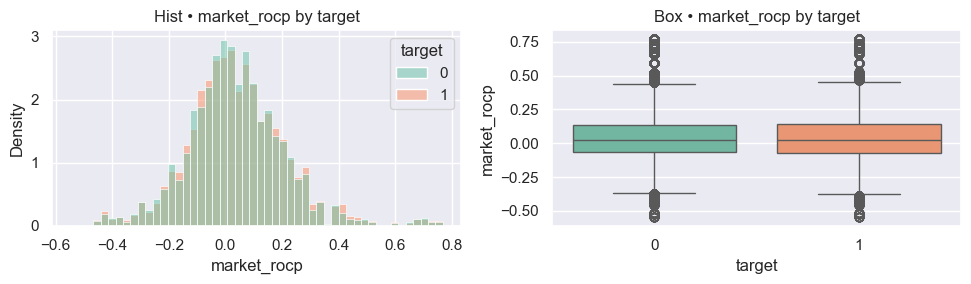

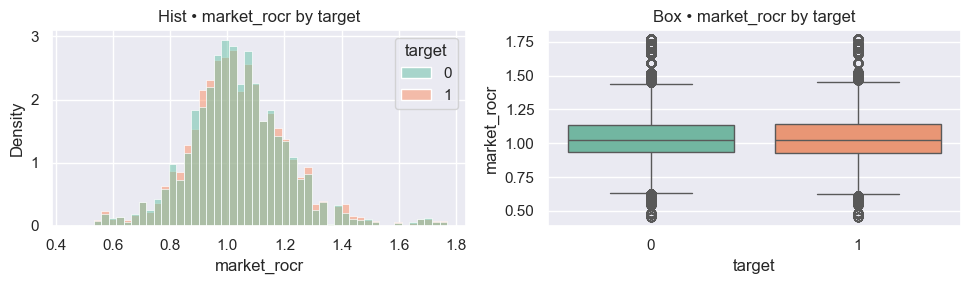

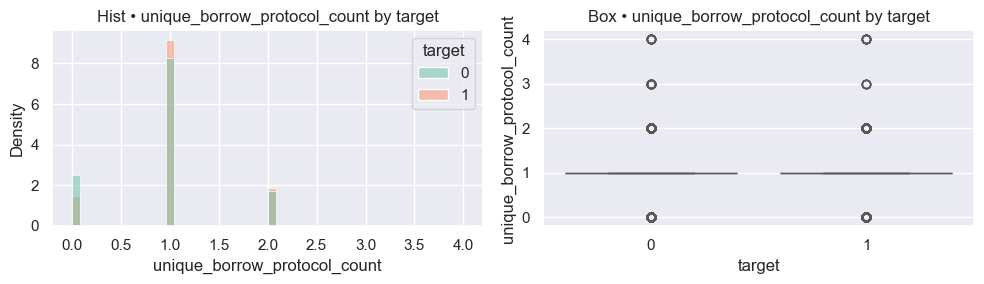

In [215]:
# Однофакторный числовой анализ по отношению к target
plot_univariate_by_target(
    df,
    features=features,    # можно оставить None, чтобы взять все числовые
    target="target",     # поменяйте при необходимости
    bins=50,
    sample=150_000,
    palette="Set2",
    max_plots=None,       # без лимита: строим для всех числовых из features
)


In [216]:
df["outgoing_tx_count"].value_counts()

outgoing_tx_count
3        3745
2        3523
6        3509
4        3274
7        3140
         ... 
10863       1
25455       1
20818       1
11814       1
22844       1
Name: count, Length: 19164, dtype: int64

In [217]:
train = df[df["subset"] == "train"]
val = df[df["subset"] == "val"]
test = df[df["subset"] == "test"]

In [218]:
params = dict(
    criterion='gini',          # 'gini' | 'entropy' | 'log_loss' (для вероятностей)
    splitter='best',           # 'best' | 'random'
    max_depth=None,            # ограничить, например 6–12, чтобы не переобучаться
    min_samples_split=2,       # мин. объектов для сплита (int или доля [0,1))
    min_samples_leaf=1,        # мин. объектов в листе
    min_weight_fraction_leaf=0.0,
    max_features=None,         # None | 'sqrt' | 'log2' | int | float
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0, # порог прироста для сплита
    class_weight='balanced',         # None | 'balanced' | dict
    ccp_alpha=0.0              # cost-complexity pruning; >0 = пост-обрезка
)

In [219]:
clf = DecisionTreeClassifier(**params)

In [220]:
X_tr = train[features]
y_tr = train['target']
X_va = val[features]
y_va = val['target']

X_full = pd.concat([X_tr, X_va], axis=0)
y_full = pd.concat([y_tr, y_va], axis=0)

In [221]:
clf.fit(X_full, y_full)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [222]:
clf.score(val[features], val['target'])

1.0

In [223]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

X_va, y_va = val[features], val['target']

y_pred = clf.predict(X_va)
y_proba = clf.predict_proba(X_va)[:, 1]  # для деревьев есть predict_proba

print('accuracy:', accuracy_score(y_va, y_pred))
print('f1:',       f1_score(y_va, y_pred))
print('roc_auc:',  roc_auc_score(y_va, y_proba))
print('confusion_matrix:\n', confusion_matrix(y_va, y_pred))
print(classification_report(y_va, y_pred))

accuracy: 1.0
f1: 1.0
roc_auc: 1.0
confusion_matrix:
 [[62379     0]
 [    0 37621]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62379
           1       1.00      1.00      1.00     37621

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000



In [224]:
X_te, y_te = test[features], test['target']

y_pred  = clf.predict(X_te)
y_proba = clf.predict_proba(X_te)[:, 1]

print('accuracy:', accuracy_score(y_te, y_pred))
print('f1:', f1_score(y_te, y_pred))
print('roc_auc:', roc_auc_score(y_te, y_proba))
print('pr_auc (AP):', average_precision_score(y_te, y_proba))
print('confusion_matrix:\n', confusion_matrix(y_te, y_pred))
print(classification_report(y_te, y_pred))

accuracy: 0.7624806765481495
f1: 0.6837183308494784
roc_auc: 0.7467498861033179
pr_auc (AP): 0.5863353778875844
confusion_matrix:
 [[72303 16963]
 [16993 36702]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     89266
           1       0.68      0.68      0.68     53695

    accuracy                           0.76    142961
   macro avg       0.75      0.75      0.75    142961
weighted avg       0.76      0.76      0.76    142961

